![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fhackathon&branch=master&subPath=ColonizingMars/ChallengeTemplates/challenge-option-2-how-could-we-colonize-mars.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# Data Scientist Challenge: Humanity must build a new home on Mars.


You’re a data scientist on a team of newly-arrived humans. While you were on Earth, you figured out how you could make the planet habitable. From growing food to clothing needs, you need to start building the framework for sustaining life on the red planet. 

In this notebook, we have decided to focus on **Plastics** as key resource that needs to be produced and properly managed.   

![music image](https://github.com/callysto/hackathon/blob/sustainable-society/SustainabilityOnMars/ChallengeExamples/plastic-example-image.jpg?raw=true)

### Section I: About You

Plastics are useful for generating fibers (textiles, rope), sheets (bags, wraps, windows), and 3D structures. On Earth, one million plastic drinking bottles are purchased every minute, and up to 5 trillion single-use plastic bags are used worldwide every year. In total, half of all plastic produced is designed to be used only once — and then thrown away (source: UN Environment). 

As a data scientist, we can help researchers understand where the plastic is found and look for innovative ways to recycle plastics and reduce plastic pollution. There is no such thing as a sustainable product in unsustainable packaging.

In this notebook, we want to help scientists reduce  what is not needed so we want to answer the question of **where does tha mjority of plastic waste come from** ? we can answer this in many ways, e.g. by sector, by country.  We will also explore the extent of plastic waste coming from lollipops. 

### Section II: The data you used

The data in this notebook was downloaded from Citizen Science Cloud: https://hub.cscloud.host/app/ec-2020-plastics. 

It comes from **three** different projects. 

1. Marine Debris Monitoring and Assessment Project: a National Oceanic and Atmospheric Administration-coordinated citizen science initiative that engages volunteers to survey and record the amount and types of marine debris on shorelines. 

2. Ocean Conservancy TIDES Database: a public, global ocean trash data set, all collected by volunteers 

3. European Environment Agency's Marine LitterWatch: Data collected by the Marine Litter Watch is collected as both clean-ups and as monitoring events. 

Below are some of the fields available for each track which we will use to answer the questions we are interested in:

**CountryName_FromSource** — country name.\
**TotalClassifiedItems_EC2020** - equals the sum of columns from [SUM_Hard_PlasticBeverageBottle to SUM_OtherPlasticDebris]
**PCT_PlasticAndFoam** - percentage of plastic and foam from total classified items
**PCT_Glass_Rubber_Lumber_Metal** - percentage of rubber, lumber and metal from total classified items
**CONTINENT** - continent
**SUM_HardPlasticBeverageBottle** - sum of 


In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf

In [4]:
# reading the data 
# we have csv file stored in the cloud
url = "https://raw.githubusercontent.com/callysto/hackathon/sustainable-society/SustainabilityOnMars/ChallengeExamples/plastics-data-2015-2018.csv"

# read csv file from url and save it as dataframe
plastics = pd.read_csv(url, index_col=0, low_memory=False)

# print first 5 rows
plastics.head()

,UniqueID,SourceID,LocationFreqID,Dataset,Organization,CountryName_FromSource,Longitude1,Latitude1,Longitude2,Latitude2,...,SUM_Foam_OtherPlasticDebris,SUM_OtherPlasticDebris,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,COUNTRYAFF,CONTINENT,LAND_TYPE
1,MDP-349,40-3153,Blackpoint Beach (Lon -123.4355847 Lat 38.6905...,NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,United States,-123.435585,38.690549,-123.432939,38.689234,...,13,1.0,California,United States,USCA,US,CA,United States,North America,Primary land
2,MDP-351,37-3164,Dune Drift Beach (Lon -123.4844062 Lat 38.7287...,NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,United States,-123.484406,38.728707,-123.487692,38.733347,...,9,0.0,California,United States,USCA,US,CA,United States,North America,Primary land
3,MDP-354,59-3175,Ohlson Beach (Lon -123.4564 Lat 38.7132),NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,United States,-123.456400,38.713200,-123.455100,38.710600,...,0,0.0,California,United States,USCA,US,CA,United States,North America,Primary land
4,MDP-358,41-3191,Walk On Beach (Lon -123.490915 Lat 38.735105),NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,United States,-123.490915,38.735105,-123.489614,38.731897,...,0,0.0,California,United States,USCA,US,CA,United States,North America,Primary land
5,MDP-360,11-3195,Rocky Point (Lon -124.4621 Lat 42.7149),NOAA MDMAP Accumulation Survey,Redfish Rocks,United States,-124.462100,42.714900,-124.462000,42.713900,...,850,0.0,Oregon,United States,USOR,US,OR,United States,North America,Primary land


In [5]:
# how many rows and colums does the dataframe have?
plastics.shape

(54388, 51)

### Section III: Data Analysis and Visualization

We want to explore what are the major sources of plastic waste ? 

In [6]:
# print column names
plastics.columns

Index(['UniqueID', 'SourceID', 'LocationFreqID', 'Dataset', 'Organization',
       'CountryName_FromSource', 'Longitude1', 'Latitude1', 'Longitude2',
       'Latitude2', 'TotalWidth_m', 'TotalLength_m', 'ShorelineName',
       'EventType', 'TotalVolunteers', 'MonthYear', 'Year', 'MonthNum',
       'Month', 'TotalClassifiedItems_EC2020', 'PCT_PlasticAndFoam',
       'PCT_Glass_Rubber_Lumber_Metal', 'SUM_Hard_PlasticBeverageBottle',
       'SUM_Hard_OtherPlasticBottle', 'SUM_HardOrSoft_PlasticBottleCap',
       'SUM_PlasticOrFoamFoodContainer', 'SUM_Hard_BucketOrCrate',
       'SUM_Hard_Lighter', 'SUM_OtherHardPlastic',
       'SUM_PlasticOrFoamPlatesBowlsCup', 'SUM_HardSoft_PersonalCareProduc',
       'SUM_HardSoftLollipopStick_EarBu', 'SUM_Soft_Bag',
       'SUM_Soft_WrapperOrLabel', 'SUM_Soft_Straw', 'SUM_Soft_OtherPlastic',
       'SUM_Soft_CigaretteButts', 'SUM_Soft_StringRingRibbon', 'Fishing_Net',
       'SUM_FishingLineLureRope', 'Fishing_BuoysAndFloats',
       'SUM_Foam_OtherPl

The column 'TotalClassifiedItems_EC2020' contains the total number of plastic waste sources that have been collected and then classified. Let's sort the data descencingly according to this column to identify the major sources of plastic waste. 

In [7]:
# We start by all plastic waste sources 
plastics.sort_values(by='TotalClassifiedItems_EC2020',ascending=False)

,UniqueID,SourceID,LocationFreqID,Dataset,Organization,CountryName_FromSource,Longitude1,Latitude1,Longitude2,Latitude2,...,SUM_Foam_OtherPlasticDebris,SUM_OtherPlasticDebris,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,COUNTRYAFF,CONTINENT,LAND_TYPE
50185,TID-51979,66013,TIDES (Lon -0.18885935584342 Lat 5.6160064497862),Oecan Conservancy TIDES Report,"SNFYVF- Accra, Volta Region",Ghana,-0.18886,5.61601,NaN,NaN,...,8456479,15234016.0,Greater Accra,Ghana,GHAA,GH,AA,Ghana,Africa,Primary land
50191,TID-51985,66019,TIDES (Lon 0.89120190773031 Lat 5.7817777402577),Oecan Conservancy TIDES Report,SNFYVF- Anloga,Ghana,0.89120,5.78178,NaN,NaN,...,4112429,6114136.0,Volta,Ghana,GHTV,GH,TV,Ghana,Africa,Primary land
50183,TID-51977,66011,TIDES (Lon -0.22499734414168 Lat 5.5290572931819),Oecan Conservancy TIDES Report,"SNFYVF- Accra, Korle Gono Beach",Ghana,-0.22500,5.52906,NaN,NaN,...,2354117,4115426.0,Greater Accra,Ghana,GHAA,GH,AA,Ghana,Africa,Primary land
50182,TID-51976,66010,TIDES (Lon -0.098134654142427 Lat 5.5794431263...,Oecan Conservancy TIDES Report,"SNFYVF- Accra, Teshie Beach",Ghana,-0.09813,5.57944,NaN,NaN,...,2119142,4471246.0,Greater Accra,Ghana,GHAA,GH,AA,Ghana,Africa,Primary land
50186,TID-51980,66014,TIDES (Lon 0.7696046624684 Lat 5.7716927421673),Oecan Conservancy TIDES Report,"SNFYVF- Accra, Dzita",Ghana,0.76960,5.77169,NaN,NaN,...,1324121,2174997.0,Volta,Ghana,GHTV,GH,TV,Ghana,Africa,Primary land
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39963,TID-40801,49063,TIDES (Lon 103.08908 Lat 5.40554),Oecan Conservancy TIDES Report,2 Marine Biology,Malaysia,103.08908,5.40554,NaN,NaN,...,0,0.0,Terengganu,Malaysia,MY11,MY,11,Malaysia,Asia,Primary land
24774,TID-23205,28544,TIDES (Lon -80.05129 Lat 26.50476),Oecan Conservancy TIDES Report,Sea turtle advfe ntupre se,USA,-80.05129,26.50476,NaN,NaN,...,0,0.0,Florida,United States,USFL,US,FL,United States,North America,Primary land
42090,TID-43375,51677,TIDES (Lon -80.065894302447 Lat 26.622105689591),Oecan Conservancy TIDES Report,Highland Elementary,USA,-80.06589,26.62211,NaN,NaN,...,0,0.0,Florida,United States,USFL,US,FL,United States,North America,Primary land
19269,TID-16884,21969,TIDES (Lon 1.57788 Lat 50.51594),Oecan Conservancy TIDES Report,NaN,France,1.57788,50.51594,NaN,NaN,...,0,0.0,Nord-Pas-de-Calais,France,FRO,FR,O,France,Europe,Primary land


Let's look at maximum number of plastic waste items collected and classified. 

In [8]:
# largest number of plastic items collected and classified
print("The maximum number of plastic items collected and classified is - " , plastics['TotalClassifiedItems_EC2020'].max(), 'item')

The maximum number of plastic items collected and classified is -  26420613 item


In [9]:
# let's look at the data associated with this number
plastics.iloc[plastics['TotalClassifiedItems_EC2020'].argmax()]

UniqueID                                                                   TID-51979
SourceID                                                                       66013
LocationFreqID                     TIDES (Lon -0.18885935584342 Lat 5.6160064497862)
Dataset                                               Oecan Conservancy TIDES Report
Organization                                             SNFYVF- Accra, Volta Region
CountryName_FromSource                                                         Ghana
Longitude1                                                                  -0.18886
Latitude1                                                                    5.61601
Longitude2                                                                       NaN
Latitude2                                                                        NaN
TotalWidth_m                                                                     NaN
TotalLength_m                                                    

#### Observations
We can see here that the highest number of plastic waste items collected comes from Ghana in Africa. 

Does this mean that Ghana has the highest plastic pollution ? Think about it then check the conclusion section for some insights. 

Let's breakdown this number and look at the contribution of each collected plastic item to this BIG number. We will draw a barplot to visualise the collected plastic items and their counts. 

In [10]:
# let's first select the columns and rows we are interested in
# select the columns containing the required data
maximum_plastics_waste = plastics.loc[50185, 'SUM_Hard_PlasticBeverageBottle':'SUM_OtherPlasticDebris']
maximum_plastics_waste = maximum_plastics_waste.to_frame()

# rename column name to reflect the data within
maximum_plastics_waste.columns = ['plastic_waste_sources']

In [11]:
maximum_plastics_waste

,plastic_waste_sources
SUM_Hard_PlasticBeverageBottle,4976
SUM_Hard_OtherPlasticBottle,3514
SUM_HardOrSoft_PlasticBottleCap,26771
SUM_PlasticOrFoamFoodContainer,4775
SUM_Hard_BucketOrCrate,0
SUM_Hard_Lighter,763
SUM_OtherHardPlastic,409
SUM_PlasticOrFoamPlatesBowlsCup,247666
SUM_HardSoft_PersonalCareProduc,3230
SUM_HardSoftLollipopStick_EarBu,0


In [12]:
# let's create the barplot to visualise what's the biggest source of plastic waste in Ghana 
# maximum_plastics_waste.plot(kind = 'bar')
cf.go_offline()
maximum_plastics_waste.iplot(kind='bar', title='xx', yTitle='xx', xTitle='xx')

#### Observations
We can see here that the biggest sources of plastic pollution in Ghana, comes from foam (plates and cups), plastic debris, and to a lesser extent from cigarette butts, and soft straws.

We also observe that the columns 'SUM_OtherPlasticDebris' and 'SUM_Foam_OtherPlasticDebris' are significanlty larger than the rest of the values. What happens when we recreate the bar plot without these two columns.  

Let's redraw the barplot witout the 'Sum_OtherPlasticDebris' and 'SUM_Foam_OtherPlasticDebris' columns. 

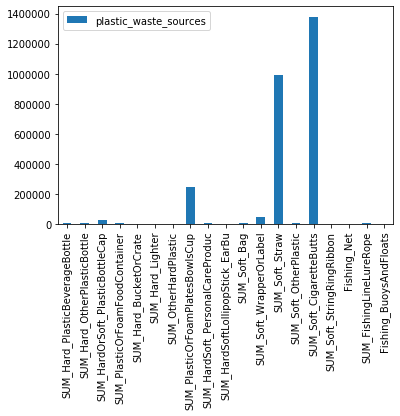

In [12]:
# first we drop the columns we are not interested in
maximum_plastics_waste = maximum_plastics_waste.drop(['SUM_OtherPlasticDebris', 'SUM_Foam_OtherPlasticDebris'], axis = 0)

# then we redraw the bar plot
maximum_plastics_waste.plot(kind = 'bar')

#### Observations
We observe that soft cigarette butts, and soft straws are the major contributors to plastic waste in Ghana, Africa.

### How about lollipop sticks ? Do we have to give up lollipop on Mars ? 

We noted that lollipo sticks and ear buds were counted and classified among the plastic items that contribute to plastic waste. How much does lollipops actually contirubte to plastic waste ?  

To answer this question, let's look at the distribution of lollipop stick waste across continents. 

We will draw a scatter plot for the count of lollipo sticks in every continent using the columns 'SUM_HardSoftLollipopStick_EarBu' and 'CONTINENT'

Text(0.5, 0, 'Year')

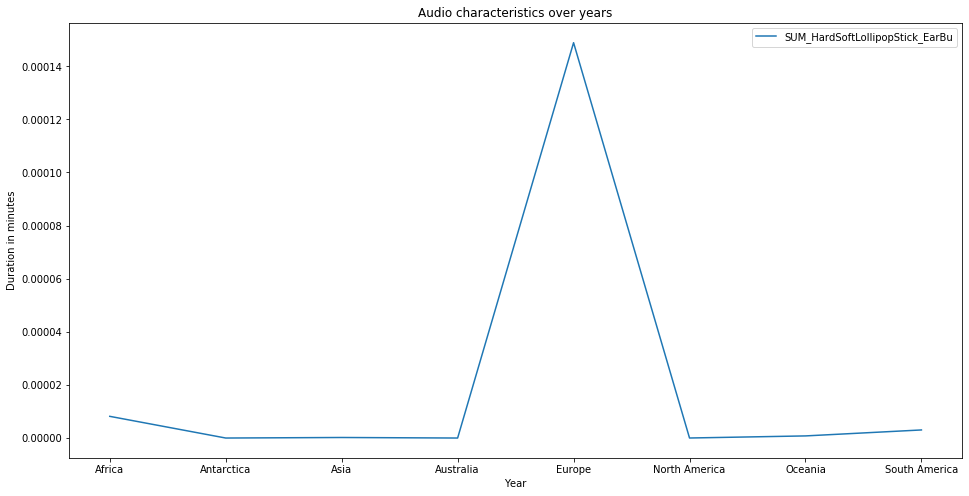

In [13]:
# draw the scatter plot
plt.figure(figsize=(16,8))
columns = ["SUM_HardSoftLollipopStick_EarBu"]
for col in columns:
    x = plastics.groupby("CONTINENT")[col].mean()
    x = x/(1000*60)
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over years')
ax.set_ylabel('Duration in minutes')
ax.set_xlabel('Year')

#### Observations
We observe that only Europeans have lollipos (and Ear buds) contributing to sources of plastic waste. 

Does this make sense ? Does this mean people in all continents but Europe, do not eat any lollipos ? 

Ofcourse NOT ! People all over the globe eat lollipos. 
Rememeber that this was an aggregated dataset from three different sources, so let's look at counts of lollipops from each of the three datasets. 

Text(0.5, 0, 'Year')

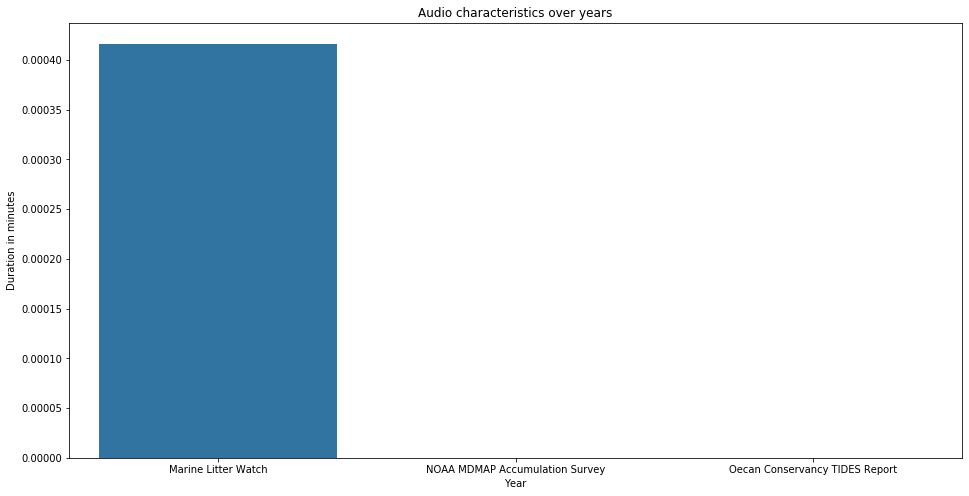

In [15]:
# plot counts of lollipops by data source
plt.figure(figsize=(16,8))
columns = ["SUM_HardSoftLollipopStick_EarBu"]
for col in columns:
    x = plastics.groupby("Dataset")[col].mean()
    x = x/(1000*60)
    ax= sns.barplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over years')
ax.set_ylabel('Duration in minutes')
ax.set_xlabel('Year')

### Section IV: Conclusion

We have used data to know that Ghana has the highest number of collected plastic waste items. While this can imply that Ghana has the highest plastic waste across al countries, it could be a limitation of this particular dataset where the number of volunteers could be higher or there could be more plastic waste on particular dates (e.g. holidays). 

We have also seen that lollipos sticks and ear buds were only collected and counted by the 'European Environment Agency's Marine LitterWatch; project which fasely implied that lollipop sticks are source of plastic waste only in Euorpe. 

### What's next ?

Several other questions can be answered with this dataset like how does the trend in sources of plastic waste vary across the years or months ? 

In this example you have seen how data can give us insights into questions and solutions that are both data-driven. Now go to the hackathon template and start solving your own challenge for sustaining life on Mars !